### Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Updated_diabetic_data.csv')
df.head()

race  gender  age  admission_type_id  discharge_disposition_id  \
0  AfricanAmerican  Female   25                  1                         1   
1        Caucasian    Male   35                  1                         1   
2        Caucasian    Male   45                  1                         1   
3        Caucasian    Male   55                  2                         1   
4        Caucasian    Male   65                  3                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    7                 2                  11               5   
1                    7                 2                  44               1   
2                    7                 1                  51               0   
3                    2                 3                  31               6   
4                    2                 4                  70               1   

   num_medications  ...  tolazamide  insulin  glyburide-metformin  \
0               13  ...          No       No                   No   
1               16  ...          No       Up                   No   
2                8  ...          No   Steady                   No   
3               16  ...          No   Steady                   No   
4               21  ...          No   Steady                   No   

  glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                  No                       No                      No   
1                  No                       No                      No   
2                  No                       No                      No   
3                  No                       No                      No   
4                  No                       No                      No   

   metformin-pioglitazone change diabetesMed readmitted  
0                      No      0           1          0  
1                      No      1           1          0  
2                      No      1           1          0  
3                      No      0           1          0  
4                      No      1           1          0  

[5 rows x 43 columns]

#### Plot the distribution of unique classes of the target variable, i.e., readmitted.  

In [2]:
import plotly.express as px

# Make a DataFrame containing the counts of every distinct "readmitted" class.
readmitted_counts = df['readmitted'].value_counts().reset_index()
readmitted_counts.columns = ['Readmission Status', 'Count']

# With Plotly, created an interactive bar chart.
fig = px.bar(readmitted_counts, x='Readmission Status', y='Count', color='Readmission Status',
             title='Distribution of Unique Classes of "readmitted"',
             labels={'Count': 'Count'},
             color_discrete_map={'NO': 'lightblue', '>30': 'lightgreen', '<30': 'lightcoral'})

fig.show()


#### Plot illustrating the frequency of readmitted cases categorized by age.

In [3]:
# Grouped the data by age and readmitted status and count occurenecs
grouped_df = df.groupby(['age', 'readmitted']).size().reset_index(name='count')

# Bar Plot Using Plotly
fig = px.bar(grouped_df, x='age', y='count', color='readmitted',
             title='Count of Readmitted Cases against Age',
             labels={'count': 'Count', 'age': 'Age'},
             color_discrete_map={'NO': 'lightblue', '>30': 'lightgreen', '<30': 'lightcoral'})

fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

#### Plotted a graph that displays the count of target variable against the number of medications. 

In [4]:
# Grouped the data availabe by  'num_medications' and 'readmitted', and count occurrences
grouped_df = df.groupby(['num_medications', 'readmitted']).size().reset_index(name='count')

# Created a bar plot using Plotly Express
fig = px.bar(grouped_df, x='num_medications', y='count', color='readmitted',
             title='Count of Readmitted Cases against Number of Medications',
             labels={'count': 'Count', 'num_medications': 'Number of Medications'},
             color_discrete_map={'NO': 'lightblue', '>30': 'lightgreen', '<30': 'lightcoral'})

fig.update_layout(xaxis_title='Number of Medications', yaxis_title='Count')
fig.show()

#### Correlation matrix. 

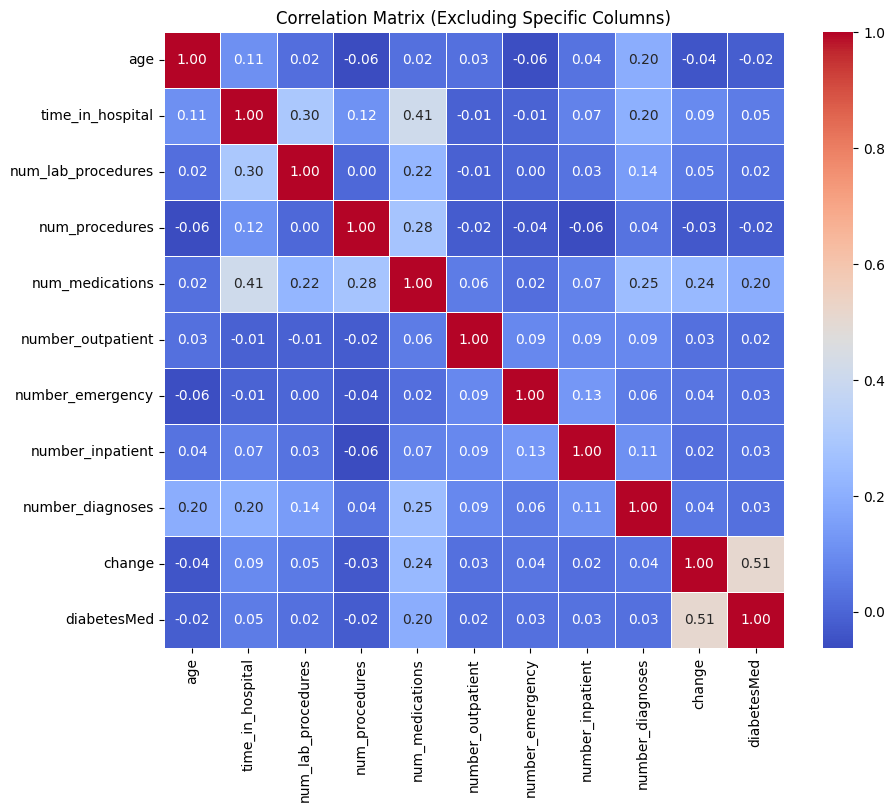

In [5]:
# Sorting Out  numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculating correlation matrix excluding specific columns
columns_to_exclude = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id','readmitted']
correlation_matrix = numeric_df.drop(columns_to_exclude, axis=1).corr()

# Created a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Excluding Specific Columns)')
plt.show()

#### The correlation matrix reveals a significant correlation between 'time_in_hospital' and 'num_medications', as well as between 'number_emergency' and 'number_inpatient', indicating interdependence among these features.

### Additional Plots

#### 1) Distribution of Age

In [6]:
fig = px.histogram(df, x='age', title='Distribution of Age', nbins=20)
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

#### 2) Number of Medications by Age

In [7]:
fig = px.box(df, x='age', y='num_medications', title='Number of Medications by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Number of Medications')
fig.show()

#### 3) Readmission Status by Age and Gender

In [8]:
fig = px.histogram(df, x='age', color='readmitted', facet_col='gender', barmode='group', title='Readmission Status by Age and Gender')
fig.update_layout(xaxis_title='Age', yaxis_title='Count', legend_title='Readmission Status')
fig.show()